In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.stats import pearsonr, ttest_ind
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, auc

In [6]:
stats_df = pd.read_csv("job.stats.csv")
embeddings_train_df = pd.read_csv("job.embeddings_train.csv")
embeddings_test_df = pd.read_csv("job.embeddings_test.csv")
feature_importance_df = pd.read_csv("job.feature_importance.IntegratedGradients.csv")
feature_logs_cnv_df = pd.read_csv("job.feature_logs.cnv.csv")
feature_logs_gex_df = pd.read_csv("job.feature_logs.gex.csv")
predicted_labels_df = pd.read_csv("job.predicted_labels.csv")

In [7]:
stats_filtered = stats_df[stats_df['metric'] == 'pearson_corr']
stats_filtered = stats_filtered.sort_values(by='value', ascending=False)

In [30]:
print(stats_filtered)

           method        var variable_type        metric     value
2  supervised_vae  Erlotinib     numerical  pearson_corr  0.400043


In [8]:
best_model = stats_filtered.iloc[0]['method']
print(f"Best performing model: {best_model}")

Best performing model: supervised_vae


In [17]:
stats_filtered = stats[stats['metric'] == 'pearson_corr']
stats_sorted = stats_filtered.sort_values(by='value', ascending=False)
best_model = stats_sorted.iloc[0]

<ipython-input-35-670a246643eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats_sorted['method'], y=stats_sorted['value'], palette='tab10')


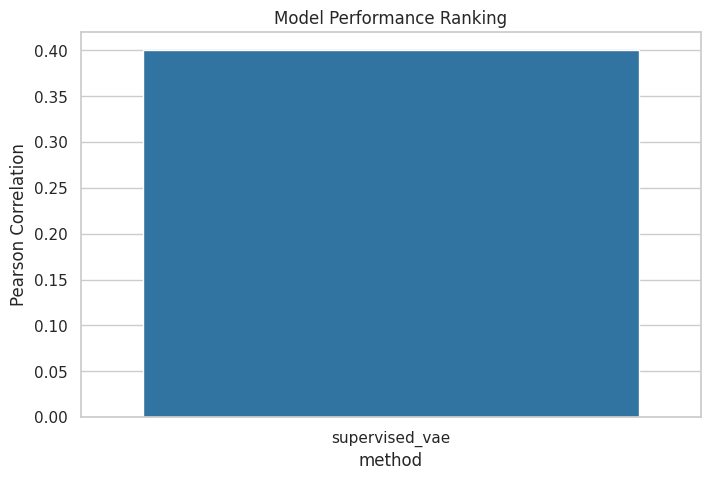

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(x=stats_sorted['method'], y=stats_sorted['value'], palette='tab10')
plt.ylabel('Pearson Correlation')
plt.title('Model Performance Ranking')
plt.show()

In [11]:
tsne = TSNE(n_components=2, random_state=42)
train_tsne = tsne.fit_transform(embeddings_train_df.iloc[:, 1:])
test_tsne = tsne.fit_transform(embeddings_test_df.iloc[:, 1:])

In [42]:
print(test_tsne,train_tsne)

[[-29.976225   -0.6510599]
 [-25.701637   14.151449 ]
 [-12.793538   -6.073734 ]
 ...
 [  3.8620436 -22.455526 ]
 [  7.7456903 -21.71871  ]
 [-15.64216    -5.7154326]] [[-40.764263    -2.3155167 ]
 [ 11.431764   -11.853499  ]
 [-30.168062    -2.9977875 ]
 ...
 [  8.961646   -15.597884  ]
 [  1.28504    -19.26544   ]
 [-45.11725     -0.21754192]]


In [12]:
top_features = feature_importance_df.sort_values(by='importance', ascending=False).head(10)

In [13]:
print(top_features)

    target_variable  target_class  target_class_label layer      name  \
378       Erlotinib             0                 NaN   gex      EGFR   
304       Erlotinib             0                 NaN   gex  PPP1R13L   
392       Erlotinib             0                 NaN   gex   ALDH3B1   
413       Erlotinib             0                 NaN   gex      VCAN   
93        Erlotinib             0                 NaN   gex     ITGB5   
47        Erlotinib             0                 NaN   gex       SFN   
129       Erlotinib             0                 NaN   gex       JUP   
343       Erlotinib             0                 NaN   gex     STRBP   
214       Erlotinib             0                 NaN   gex      RIN2   
134       Erlotinib             0                 NaN   gex      FHL2   

     importance            explainer  
378    0.014942  IntegratedGradients  
304    0.010101  IntegratedGradients  
392    0.009436  IntegratedGradients  
413    0.008529  IntegratedGradients  
9

<ipython-input-14-534180d6aae9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='importance', y='name', palette='viridis')


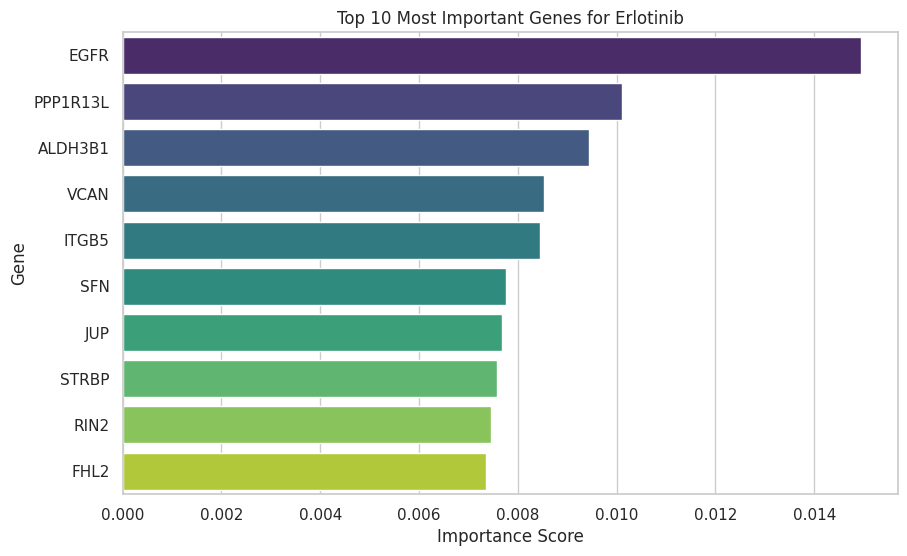

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(data=top_features, x='importance', y='name', palette='viridis')
plt.title("Top 10 Most Important Genes for Erlotinib")
plt.xlabel("Importance Score")
plt.ylabel("Gene")
plt.show()

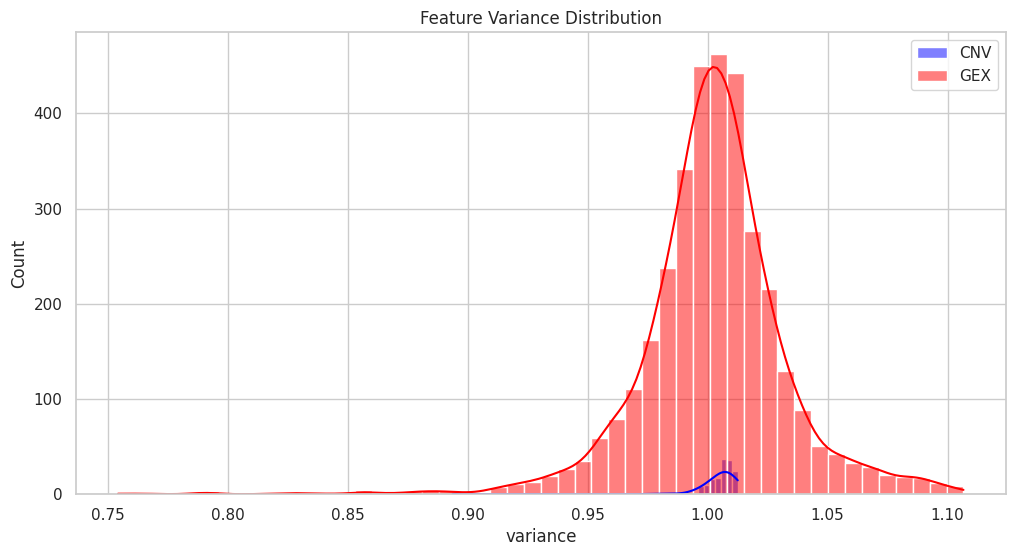

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(feature_logs_cnv_df['variance'], bins=50, kde=True, color='blue', label='CNV')
sns.histplot(feature_logs_gex_df['variance'], bins=50, kde=True, color='red', label='GEX')
plt.legend()
plt.title("Feature Variance Distribution")
plt.show()

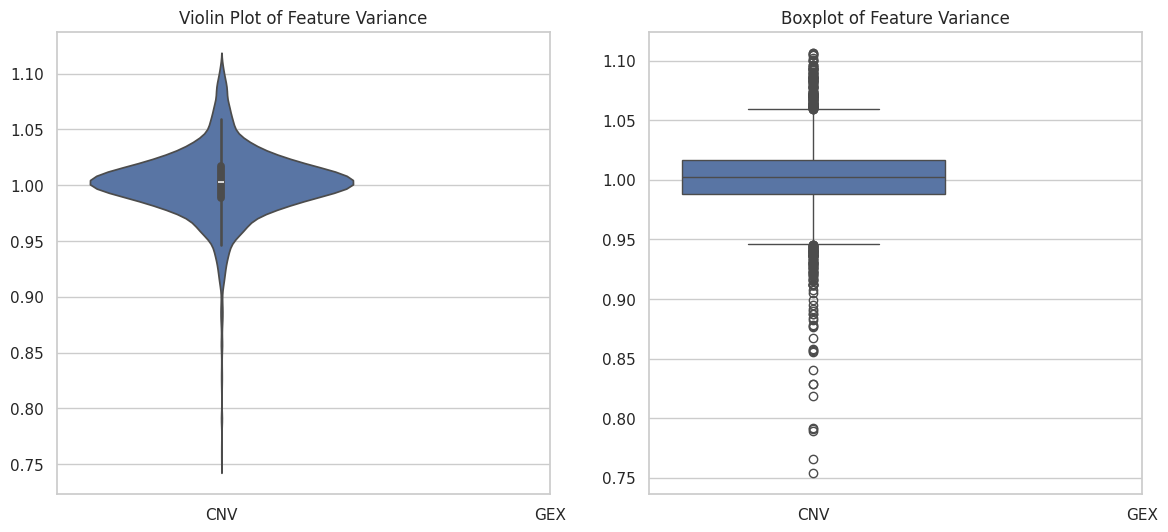

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.violinplot(data=[feature_logs_cnv_df['variance'], feature_logs_gex_df['variance']], ax=ax[0])
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["CNV", "GEX"])
ax[0].set_title("Violin Plot of Feature Variance")

sns.boxplot(data=[feature_logs_cnv_df['variance'], feature_logs_gex_df['variance']], ax=ax[1])
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["CNV", "GEX"])
ax[1].set_title("Boxplot of Feature Variance")
plt.show()

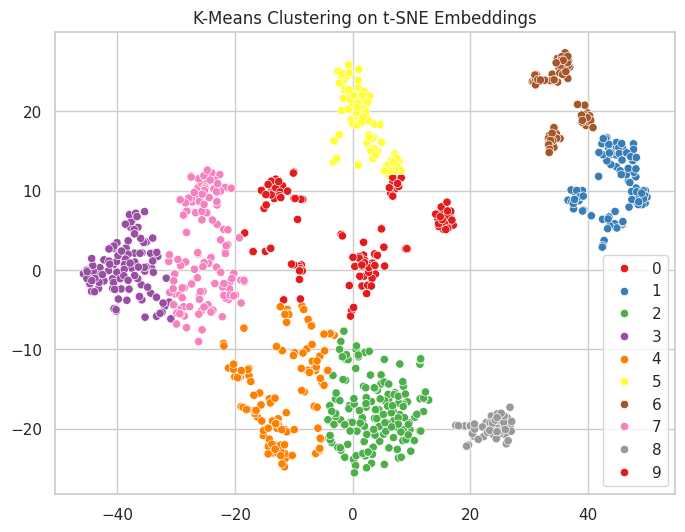

In [47]:
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(train_tsne)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_tsne[:, 0], y=train_tsne[:, 1], hue=clusters, palette="Set1")
plt.title("K-Means Clustering on t-SNE Embeddings")
plt.show()

In [49]:
top_features.to_csv('top_10_genes.csv', index=False)